In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error


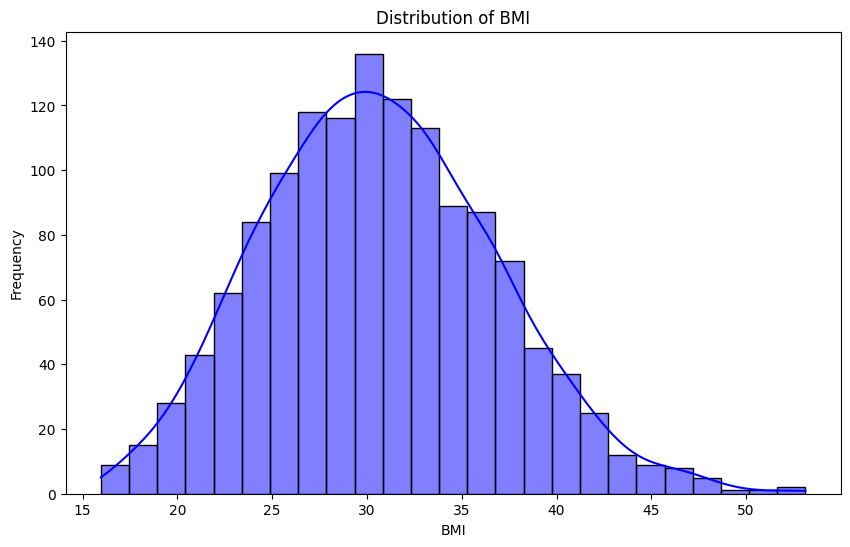

In [3]:


# Read CSV file into a pandas DataFrame
df = pd.read_csv('/content/insurance.csv')

# Extract BMI column as a NumPy array
bmi_data = df['bmi'].values

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(bmi_data, kde=True, color='blue')

# Add titles and labels
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Show the plot
plt.show()

It looks like binomial distribution

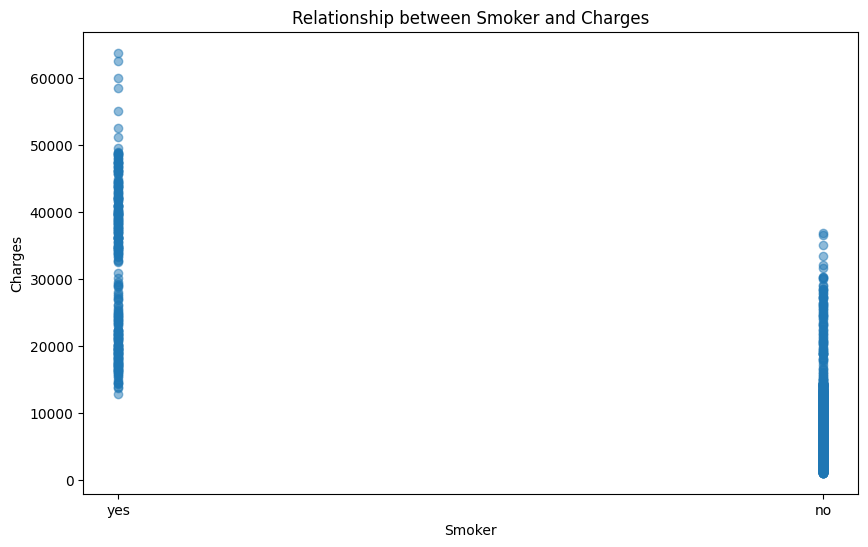

In [4]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['smoker'], df['charges'], alpha=0.5)

# Add labels and title
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Show the plot
plt.show()

It looks like smokers charges more.

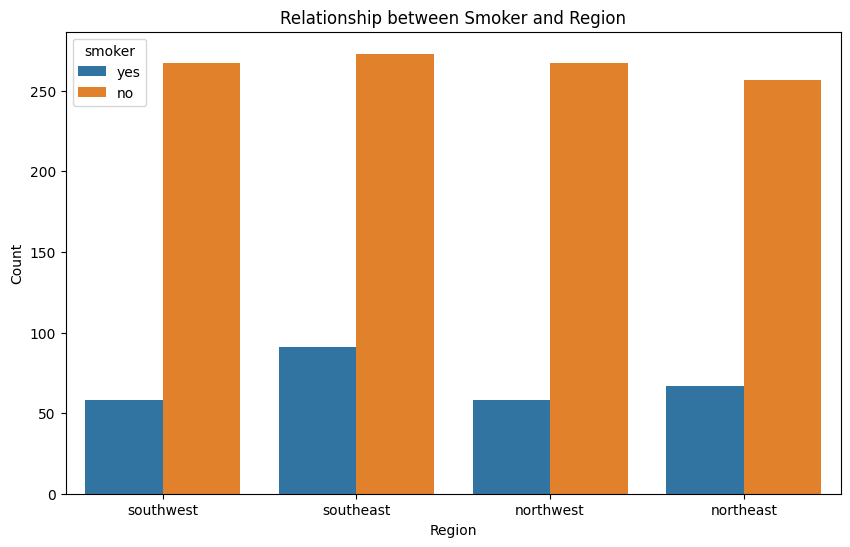

In [12]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a count plot using Seaborn
sns.countplot(x='region', hue='smoker', data=df)

# Add labels and title
plt.title('Relationship between Smoker and Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Show the plot
plt.show()

It looks like regions have similar rates but southeast a little bit ahead with smoker count.

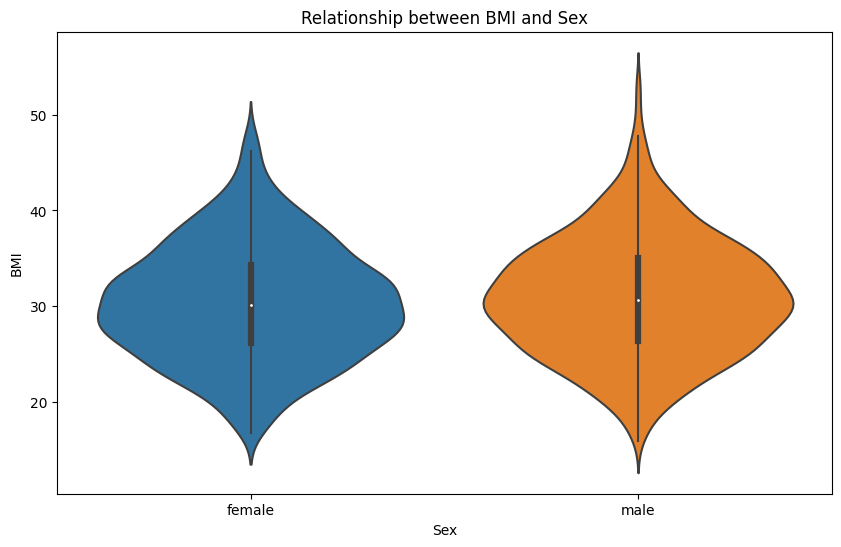

In [13]:

plt.figure(figsize=(10, 6))

# Create a violin plot using Seaborn
sns.violinplot(x='sex', y='bmi', data=df)

# Add labels and title
plt.title('Relationship between BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')

# Show the plot
plt.show()

It looks like males have more bmi than female.

In [14]:
region_children_sum = df.groupby('region')['children'].sum()

# Find the region with the most children
most_children_region = region_children_sum.idxmax()
most_children_count = region_children_sum.max()

print(f"The region with the most children is '{most_children_region}' with {most_children_count} children.")

The region with the most children is 'southeast' with 382 children.


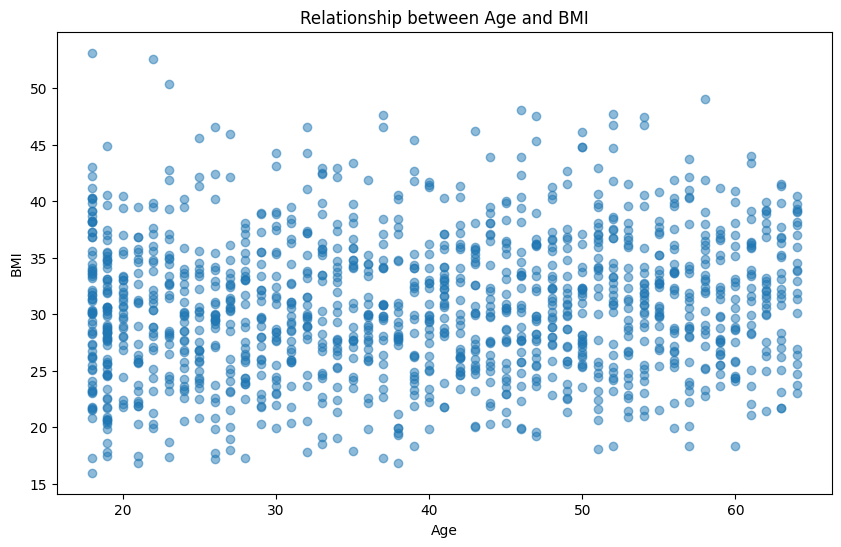

In [15]:

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['age'], df['bmi'], alpha=0.5)

# Add labels and title
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

# Show the plot
plt.show()

Its look like there is a bit cumulation on eager agest but not much.

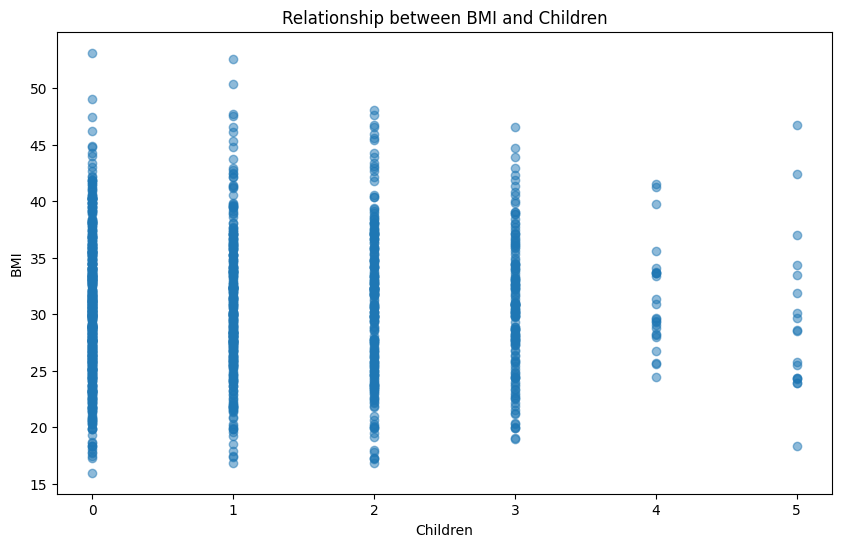

In [16]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['children'], df['bmi'], alpha=0.5)

# Add labels and title
plt.title('Relationship between BMI and Children')
plt.xlabel('Children')
plt.ylabel('BMI')

# Show the plot
plt.show()

Lower count of dependets ends up with higher bmi.

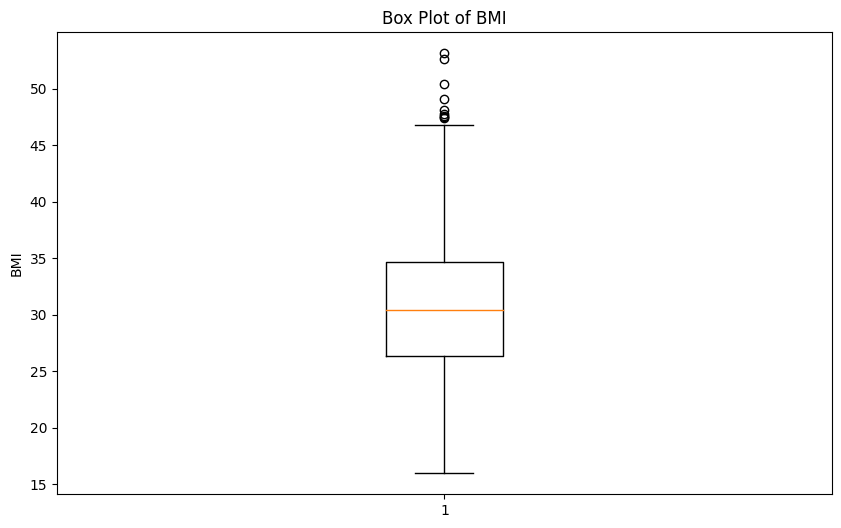

In [17]:
plt.figure(figsize=(10, 6))

# Create a box plot for "bmi"
plt.boxplot(df['bmi'])

# Add labels and title
plt.title('Box Plot of BMI')
plt.ylabel('BMI')

# Show the plot
plt.show()

In [20]:
z_scores = stats.zscore(df['bmi'])

# Define a threshold for identifying outliers
z_threshold = 3

# Find indices of outliers
outlier_indices = [index for index, z in enumerate(z_scores) if abs(z) > z_threshold]

# Print the indices of outliers
print("Indices of outliers:", outlier_indices)

Indices of outliers: [116, 847, 1047, 1317]


Respect to Z-score and visualazing there are some outliers with indices [116, 847, 1047, 1317].

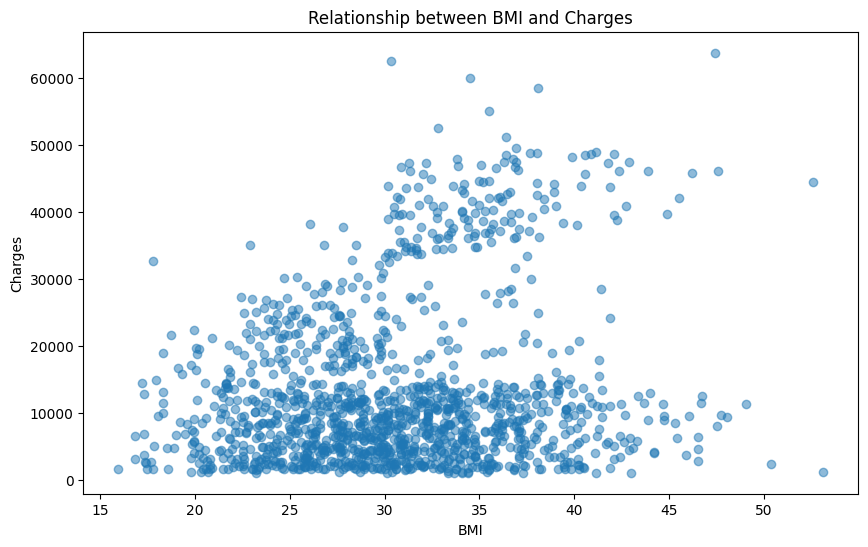

In [21]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['bmi'], df['charges'], alpha=0.5)

# Add labels and title
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Show the plot
plt.show()

It's look like lower bmi individuals have lower charges.


<ipython-input-22-7073e35d1e63>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='bmi', hue='smoker', data=df, ci=None)


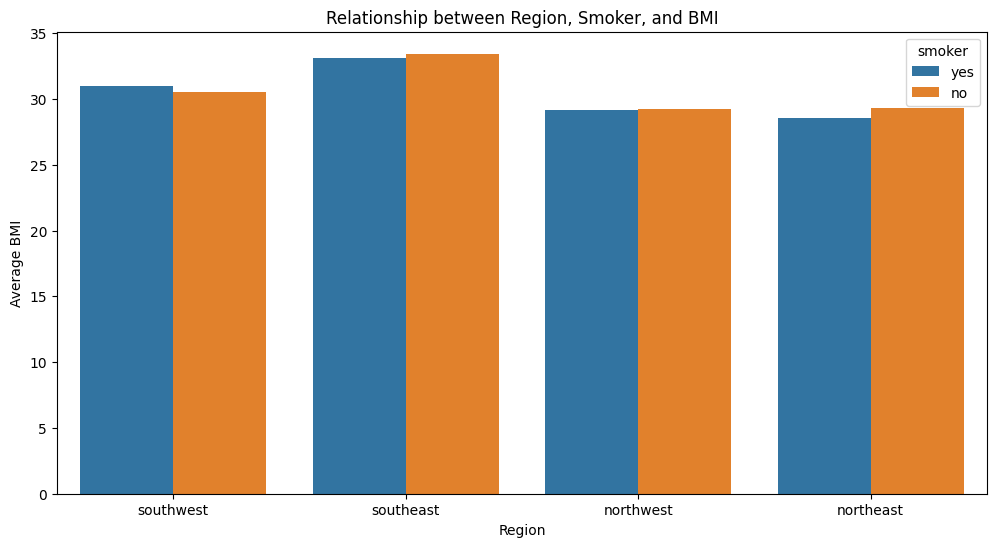

In [22]:
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn
sns.barplot(x='region', y='bmi', hue='smoker', data=df, ci=None)

# Add labels and title
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('Average BMI')

# Show the plot
plt.show()

Southeast have most bmi average and southwest is higher smoker rating.

In [23]:
encoded_df = pd.get_dummies(df, columns=['region', 'smoker','sex'])

# Display the encoded DataFrame
encoded_df.head(5)

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,1


In [29]:
X = encoded_df.drop('charges', axis=1)  # Features excluding the target column
y = encoded_df['charges']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scaled with standart scaling, beacuse the values has not limiting values. Min-max could lead to some issues.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [38]:
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
knn_reg = KNeighborsRegressor()

# Perform cross-validation and calculate mean R-squared scores
models = [linear_reg, ridge_reg, lasso_reg, random_forest_reg, gradient_boosting_reg, svr_reg, knn_reg]
for model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    mean_cv_score = cv_scores.mean()
    print(f"{model.__class__.__name__}: Mean R-squared = {mean_cv_score:.3f}")

LinearRegression: Mean R-squared = 0.733
Ridge: Mean R-squared = 0.733
Lasso: Mean R-squared = 0.733
RandomForestRegressor: Mean R-squared = 0.828
GradientBoostingRegressor: Mean R-squared = 0.840
SVR: Mean R-squared = -0.098
KNeighborsRegressor: Mean R-squared = 0.765


We can observe that GradientBoostingRegressor is to most accurate without any Hyper-parameter tuning. We chose that to improve if we can.

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gradient_boosting_reg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Perform Grid Search on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best R-squared score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best R-squared Score: 0.8467705209908291


In [52]:
y_pred = grid_search.predict(X_test_scaled)

In [53]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Explained Variance Score:", evs)
print("Max Error:", max_err)

Mean Squared Error: 19506434.150936276
Mean Absolute Error: 2620.166075693704
R-squared: 0.87435366483513
Explained Variance Score: 0.8747633896027668
Max Error: 21206.51237330196


- Mean Squared Error, Mean Absolute Error and Max Error should be as lowest as they can they represent how accurate is the model.

- R-squared and Explained Variance is needed to be as close as to 1. They show how well out features can guess the charges variable with this model.
